In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

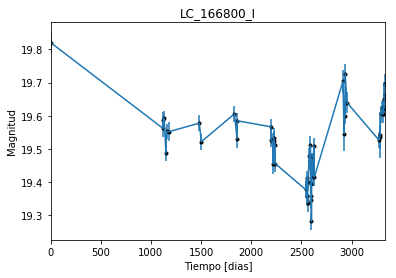

In [2]:
data = np.genfromtxt('LC_166800_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_166800_I')
plt.savefig("LC_166800_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

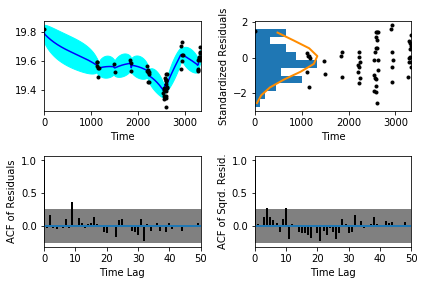

In [5]:
sample.assess_fit()

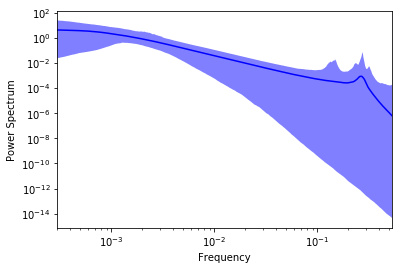

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

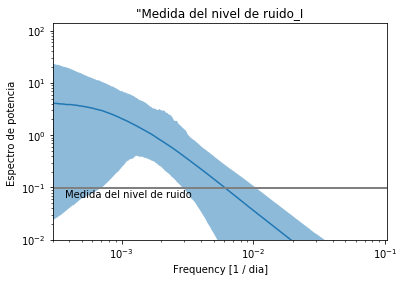

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_166800_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_166800_I')

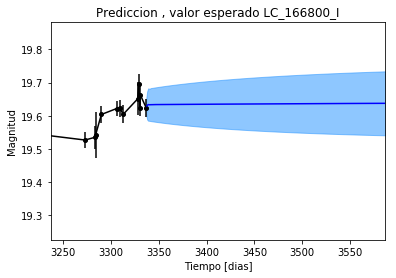

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_166800_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_166800_I')

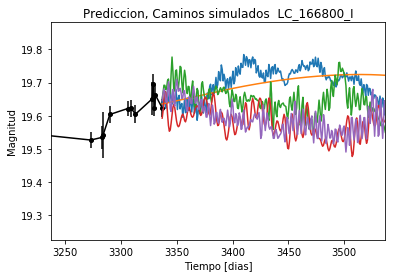

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_166800_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


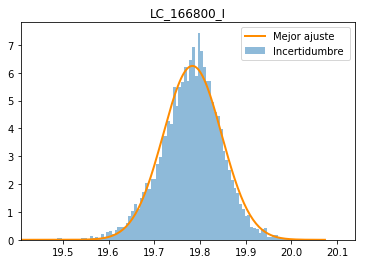

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_166800_I')
plt.savefig("Mejor_ajuste_LC_166800_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_166800_I')

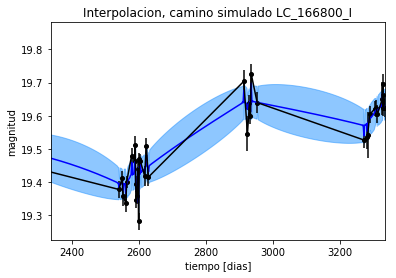

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_I')

Text(0.5,1,'Interpolacion, camino simulado LC_166800_I')

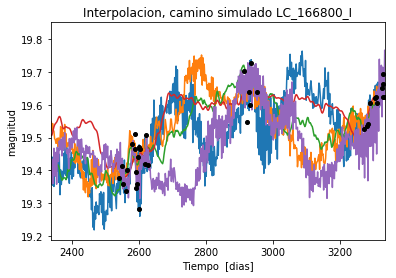

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 833.394314773
Median: 0.00738123423302
Standard deviation: 0.0878001049198
68% credibility interval: [ 0.00265595  0.0219295 ]
95% credibility interval: [ 0.00076508  0.23233761]
99% credibility interval: [  3.92514905e-04   6.61398694e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 477.271928422
Median: 0.00711770397845
Standard deviation: 0.0579670444795
68% credibility interval: [ 0.00242935  0.02010964]
95% credibility interval: [ 0.00062714  0.14849139]
99% credibility interval: [  3.52448215e-04   4.45634473e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 138.266959266
Median: 0.187244238924
Standard deviation

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 374.87048372
Median: 94.4952133031
Standard deviation: 2.87186362529
68% credibility interval: [ 90.89568858  97.12411554]
95% credibility interval: [ 88.00428253  98.44506559]
99% credibility interval: [ 85.96667054  98.75256196]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 152.25893552
Median: 1.46119948739
Standard deviation: 2.04819503498
68% credibility interval: [ 0.13411287  4.32677407]
95% credibility interval: [ 0.04571576  6.65565064]
99% credibility interval: [ 0.02811866  8.31771425]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 240.438707572
Median: 3.0233556767
Standard deviation: 7.11094948368
68% credibility interval: [ 1.1433951   4.99501704]
95% credibility interval: [  0.04453143  24.52

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20019.3727962
Median: 3.25341446039e-13
Standard deviation: 2.12069833254e+53
68% credibility interval: [  6.37021839e-51   2.10603428e+19]
95% credibility interval: [  1.19558303e-66   2.32349341e+41]
99% credibility interval: [  8.56394775e-123   2.29038108e+043]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 955.254682069
Median: 19.5795542663
Standard deviation: 0.0582438985585
68% credibility interval: [ 19.53572954  19.63606072]
95% credibility interval: [ 19.48264128  19.71905659]
99% credibility interval: [ 19.43954144  19.78597908]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 585.744750842
Median: 0.270878412613
Standard deviation: 0.174712138551
68% credibility interval: [ 0.14886228  0.32404922]
95% credibility interval: [ 0.          0.76547874]
99% credibility interval: [ 0.          0.91613382]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 585.744750842
Median: 0.270878412613
Standard deviation: 0.174712138551
68% credibility interval: [ 0.14886228  0.32404922]
95% credibility interval: [ 0.          0.76547874]
99% credibility interval: [ 0.          0.91613382]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 84.044071449
Median: 0.0
Standard deviation: 0.000538308606813
68% credi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 374.87048372
Median: 94.4952133031
Standard deviation: 2.87186362529
68% credibility interval: [ 90.89568858  97.12411554]
95% credibility interval: [ 88.00428253  98.44506559]
99% credibility interval: [ 85.96667054  98.75256196]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 432.722779773
Median: 0.0150321792337
Standard deviation: 0.0134571884932
68% credibility interval: [ 0.00929224  0.02513424]
95% credibility interval: [ 0.00635865  0.04538219]
99% credibility interval: [ 0.00493486  0.06794395]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 805.24605991
Median: 1.29620713368
Standard deviation: 0.310351059631
68% credibility interval: [ 1.03402283  1.71737192]
95% credibility interval: [ 0.8562434   1.95485553]
99% credibility interval: [ 0.69822187  1.99119228]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 574.371514436
Median: 0.0316973591063
Standard deviation: 0.307179490639
68% credibility interval: [  9.40360311e-21   1.48738622e-01]
95% credibility interval: [  2.22215489e-43   8.47209480e-01]
99% credibility interval: [  5.24929510e-46   2.28713418e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 833.394314773
Median: (-0.0463776624818-1.64503839513j)
Standard deviation: 1.22857064613
68% credibility interval: [-0.13778709-1.63079756j -0.01668786-0.94467381j]
95% credibility interval: [-1.45982028-2.48616816j -0.00480716-0.09122213j]
99% credibility interval: [ -4.15569056e+00+0.j          -2.46624389e-03-1.68294197j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 477.271928422
Median: (-0.0447218530582+1.72418057362j)
Standard deviation: 1.15659276343
68% credibility interval: [-0.12635257+1.76264145j -0.01526405+1.16904288j]
95% credibility interval: [-0.93299894+2.680137j   -0.00394042+1.67315654j]
99% credibility interval: [ -2.80000397e+00+5.09545317j  -2.21449744e-03+0.01038074j]
Posterior summary for pa